In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

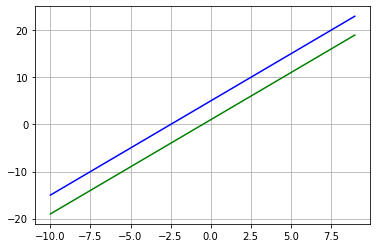

In [10]:
x = np.arange(-10, 10)
y = 1+2*x
y2 = 5+2*x
plt.plot(x,y2, 'b')
plt.plot(x,y, 'g')
plt.grid()

20.32192572438089


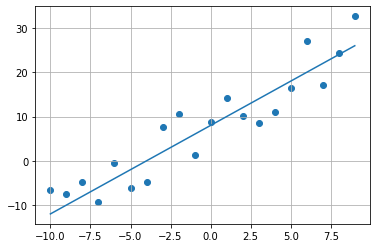

In [11]:
noise = np.random.random(20) * 8
y = 1 + 2*(x + noise)
y_predict = 8 + 2*x

print(mean_squared_error(y, y_predict))
plt.scatter(x,y)
plt.plot(x,y_predict)
plt.grid()

In [12]:
def h(x, theta):
    return np.dot(x,theta)

In [13]:
y = 1+ 2*x
y

array([-19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19])

In [14]:
theta = np.array([1,2])
new_colum = np.ones((20,1))
x = x.reshape(20,1)
x = np.append(new_colum, x, axis = 1)

In [15]:
def mean_squared_error(y_predicted, y_label):
    return np.sum((y_predicted - y_label) **2)/len(y_label)

## Closed-Form Solution
To find the value of θ that minimizes the cost function, we can differentiate the MSE with respect to θ. It directly gives us the correct θ in what we called the Normal Equation: θ = (XT·X)-1·XT·y (NB: This requires XTX to be inversible).

### → Write a class LeastSquareRegression to calculate the θ feature weights and make predictions.

In [16]:
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None  
        
    def fit(self, X, y):
        # Calculates theta that minimizes the MSE and updates self.theta_
        # find the θ = (XT·X)-1·XT·y 
        part_1 = np.dot(X.T, X)
        part_2 = np.dot(X.T, y)
        my_invent = np.linalg.inv(part_1)
        self.theta_ = np.dot(my_invent, part_2)
        
    def predict(self, X):
        # Make predictions for data X, i.e output y = h(X) (See equation in Introduction)
        return h(X, self.theta_)

### → Plot these points to get a feel of the distribution.

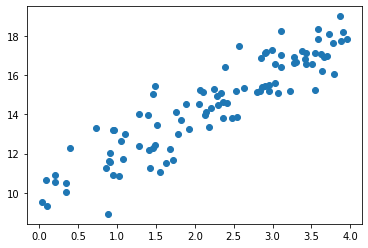

In [17]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)
plt.scatter(X,y)

### → Write a function which adds one to each instance

In [18]:
# ########## Подумать надо 
def bias_column(X):
    X = np.append(np.ones((100,1)), X, axis = 1)
    return X
X_new = bias_column(X)
print(X[:5])
print(" ---- ")
print(X_new[:5])

[[1.48743743]
 [3.58548092]
 [0.03450458]
 [2.56598472]
 [3.63435873]]
 ---- 
[[1.         1.48743743]
 [1.         3.58548092]
 [1.         0.03450458]
 [1.         2.56598472]
 [1.         3.63435873]]


### → Calculate the weights with the LeastSquaresRegression class

In [19]:
model = LeastSquaresRegression()
model.fit(X_new, y)

print(model.theta_)

[[10.00750929]
 [ 2.00796613]]


### → Use your model to predict values from X and plot the two set of points superimposed.

<module 'matplotlib.pyplot' from '/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/pyplot.py'>

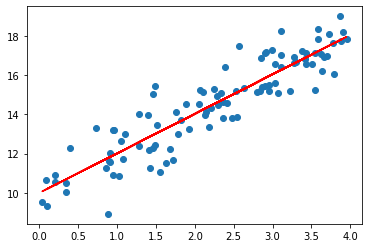

In [20]:
y_new = model.predict(X_new)

def my_plot(X, y, y_new):
    plt.scatter(X,y)
    plt.plot(X_new[:,1], y_new, 'r')
    return plt

my_plot(X, y, y_new)

## Gradient Descent

#Для начало нам надо функцию f(x), f_prime(x) для того чтобы найти минимум функции 

Let's use this optimizer with a simple function: f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T).The input of f is a vector of size 2

### → Write the f function

In [21]:
def f(x):
    a = np.array([[2],[6]])
    return 3 + np.dot((x-a).T,(x-a))

### → Write the fprime function

In [22]:
def fprime(x):
    a = np.array([[2],[6]])  
    return 2 * (x - a)

### Reminder about Gradient Descent

In [23]:
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = start
    
    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update selt.current_
        self.current_ = self.current_ - self.learning_rate_ * fprime(self.current_)
        # 2. Append the new value to history
        self.history_ = np.append(self.history_  , self.current_, axis = 1)
        # Does not return anything

        
    def optimize(self, iterations = 100):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        i = 0
        while i<iterations:
            self.step()
            i+=1
            
    def getCurrentValue():
      # Getter for current_
        return self.current_
    
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))
        return self.history_

### → Use the the gradient descent optimizer to try to find the best theta value

In [24]:
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,1)), 0.1)
grad.optimize(10)
asa = grad.print_result()

Best theta found is [[1.93930117]
 [5.22469881]]
Value of f at this theta: f(theta) = [[3.60477628]]
Value of f prime at this theta: f'(theta) = [[-0.12139765]
 [-1.55060238]]


### → Plot the progression of the gradient by using the history variable inside the class

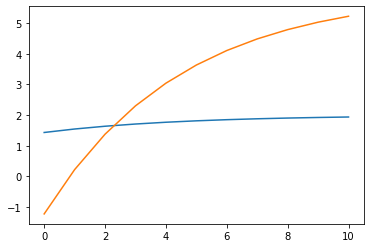

In [25]:
plt.plot(asa[0,:])
plt.plot(asa[1,:])

### → How does the learning rate and the number of iterations influence the result ?

The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights of the model are updated with each time they are updated, such as at the end of each batch of training examples.

Given a perfectly configured learning rate, the model will learn to best approximate the function given available resources (the number of layers and the number of nodes per layer) in a given number of training epochs (passes through the training data).

Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

At extremes, a learning rate that is too large will result in weight updates that will be too large and the performance of the model (such as its loss on the training dataset) will oscillate over training epochs. Oscillating performance is said to be caused by weights that diverge (are divergent). A learning rate that is too small may never converge or may get stuck on a suboptimal solution.

In [26]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v3.2.1-c2fe00c (production)
Loading parameters:  OK
User ashirov_a connection: OK


<MY_LINEAR_REGRESSION>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY LINEAR REGRESSION 

 Status             SUCCESS              
 Execution Runtime  3.212486             
 Score              [========--] 8/10    


Checks detail Report:

 TEST BIAS COLUMN I  SUCCESS 



 TEST BIAS COLUMN II  SUCCESS 



 TEST CLASS GRADIENT DESCENT OPTIMIZER                                                    FAILURE              